<a href="https://colab.research.google.com/github/Vasudev-SN/MPEA_dataset/blob/master/RNN_Project_Team(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
`# This is formatted as code`
```

# **Nasa Turbofan Engine Remaining Useful Lifetime**

# **Introduction**

During their lifetime, aircraft components are susceptible to degradation, which affects
directly their reliability and performance.This machine learning project will be directed to provide a framework for predict-ing the aircraft’s remaining useful life (RUL)
based on the entire life cycle data in order to provide the necessary maintenance behavior. 

<div align='center' > <img src='https://i.postimg.cc/gcvWCNHf/Turbofan-operation-lbp.png'>
 </div>

 <div align='center' > Illustration of a turbofan engine </div>


 Predictive maintenance techniques are designed to help determine the condition of in-service equipment in order to estimate when maintenance should be performed. This approach promises cost savings over routine or time-based preventive maintenance, because here tasks are performed only when warranted.

In this model  an attempt has been made to to predict RUL( Remaining Useful Life of NASA Turbofan Engine) by applying various ML Models. Dataset considered is FD001 dataset which can also be accessed from link https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/#turbofan.


# **Problem Defination**

 Our focus will be the prediction of the
RUL of the turbofan engine considering
HPC failure and more precisely capturing
low RUL values to avoid putting the engine
on risk. 


# **Dataset Description**

Data Set FD001 is the first in the series and the least complex.
Train trjectories: 100 engines. Test trajectories: 100 engines. Fault Modes: ONE. Datasets include simulations of multiple turbofan engines over time, each row contains the following information:

Engine unit number,

Time, in cycles

Three operational settings

21 sensor readings. No information regarding sensors have been given. If there has been some information regarding sensor type i.e. pressure sensor , temperature sensor , vibration sensor etc. then we could have fetch some more information about degradation of engine using domain knowledge.

 Each engine has 21 sensors which collects data for different measurements including the
temperature, pressure, speed, bypass ration, cooling flow of each module and so on. The first two
columns are the unit number and operational time in cycles whereas the column number three, four
and five are operational settings. Rest of the columns are sensor measurements.



 # **Objectives**

 The main objective of this thesis is to develop and implement a deep learning-based framework
for estimating the health status of physical assets using data from multisensorial measurements.
We suggest a novel data-driven method for assessing remaining useful life. To predict the RUL,
the approach learns the relationship between acquired sensor data and health indicator using the concepts of Mutual-Information



 # **Methodology**

Data inspection,

 Data visualization,

 Feature engineering,
 

  finishing with LSTM.


   # **Expected Outcome**


. The aim of this
thesis is to propose and validate a deep learning framework for producing accurate prognostics on
a system's health. Two separate datasets are used to test the proposed system, and the output results
are correctly described in tables and figures.




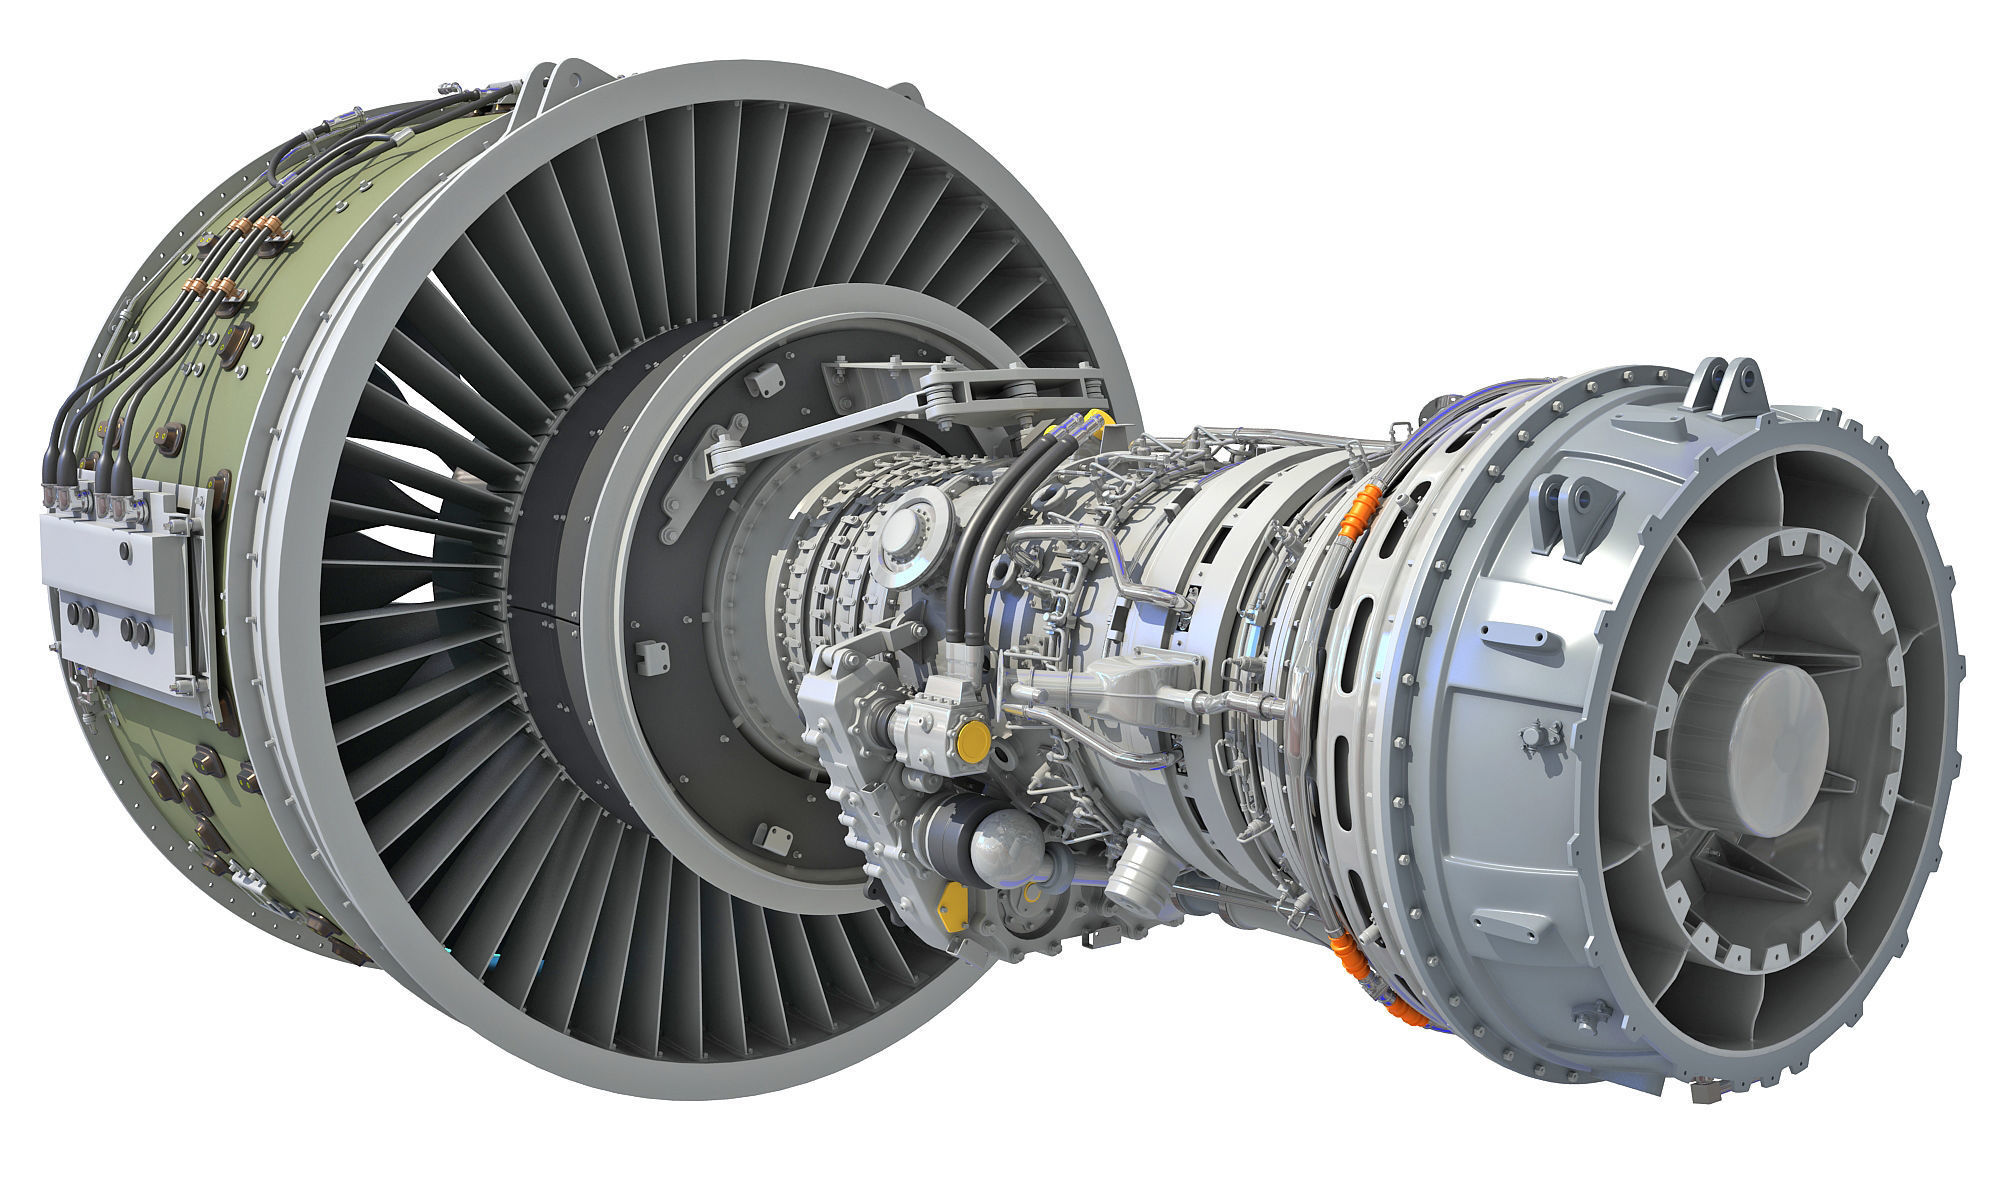


Mounting the drive in colab

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
path='drive/MyDrive'

#### Importing  important libraries

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Note : make sure to adapt the way data is collected to your environment (If you're working on kaggle you can easily click on add data then choose nasa-cmaps data).

#### Defining features names

In [161]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

# **Feature Selection**

Sensor 1, 5, 6, 10, 16, 18, and 19 in subset FD001 and FD003 exhibit constant sensor measurements throughout the engines lifetime. Constant sensor measurements does not provide any useful degradation information regarding RUL predictions . In addition, subset FD001 and FD003 are subjected to a single operating condition . Hence, the three operational settings are excluded. Accordingly, sensor 2, 3, 4, 7, 8, 9, 11, 12, 13, 14, 15, 17, 20, and 21 are used as the input features for subset FD001 and FD003.

#### Importing train and validation data

FD001 subset corresponds to HPC failure of the engine.

Note: train data will be splitted to train/test sets in the modeling part.

In [162]:
dftrain = pd.read_csv('train_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv('test_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv('RUL_FD001.txt',sep='\s+',header=None,index_col=False,names=['RUL'])
dfvalid.shape


(13096, 26)

In [163]:
train = dftrain.copy()
valid = dfvalid.copy()

### Data inspection

In [164]:
train

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [165]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   s_1          20631 non-null  float64
 6   s_2          20631 non-null  float64
 7   s_3          20631 non-null  float64
 8   s_4          20631 non-null  float64
 9   s_5          20631 non-null  float64
 10  s_6          20631 non-null  float64
 11  s_7          20631 non-null  float64
 12  s_8          20631 non-null  float64
 13  s_9          20631 non-null  float64
 14  s_10         20631 non-null  float64
 15  s_11         20631 non-null  float64
 16  s_12         20631 non-null  float64
 17  s_13         20631 non-null  float64
 18  s_14         20631 non-null  float64
 19  s_15

In [166]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  13096 non-null  int64  
 1   time_cycles  13096 non-null  int64  
 2   setting_1    13096 non-null  float64
 3   setting_2    13096 non-null  float64
 4   setting_3    13096 non-null  float64
 5   s_1          13096 non-null  float64
 6   s_2          13096 non-null  float64
 7   s_3          13096 non-null  float64
 8   s_4          13096 non-null  float64
 9   s_5          13096 non-null  float64
 10  s_6          13096 non-null  float64
 11  s_7          13096 non-null  float64
 12  s_8          13096 non-null  float64
 13  s_9          13096 non-null  float64
 14  s_10         13096 non-null  float64
 15  s_11         13096 non-null  float64
 16  s_12         13096 non-null  float64
 17  s_13         13096 non-null  float64
 18  s_14         13096 non-null  float64
 19  s_15

The dataset FD001 contains time series of 21 sensors and 3 settings of 100 units(turbofan engine).Each engine works normally at the beginning of each time series and fails at the end of the time series. Each row is a snapshot of the data taken during a single operation cycle.

In [167]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (20631, 26)
Shape of the validation dataset :  (13096, 26)
Percentage of the validation dataset :  0.3882942449669404


In [168]:
train.loc[:,['unit_number','time_cycles']].describe()

,unit_number,time_cycles
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [169]:
train.loc[:,'s_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


When we inspect the descriptive statistics of unit_nr we can see the dataset has a total of 20631 rows, unit numbers start at 1 and end at 100 as expected. What’s interesting, is that the mean and quantiles don’t align neatly with the descriptive statistics of a vector from 1–100, this can be explained due to each unit having different max time_cycles and thus a different number of rows. When inspecting the max time_cycles you can see the engine which failed the earliest did so after 128 cycles, whereas the engine which operated the longest broke down after 362 cycles. The average engine breaks between 199 and 206 cycles, however the standard deviation of 46 cycles is rather big. We’ll visualize this further down below to get an even better understanding.

Let us see what each **sensor** measure 

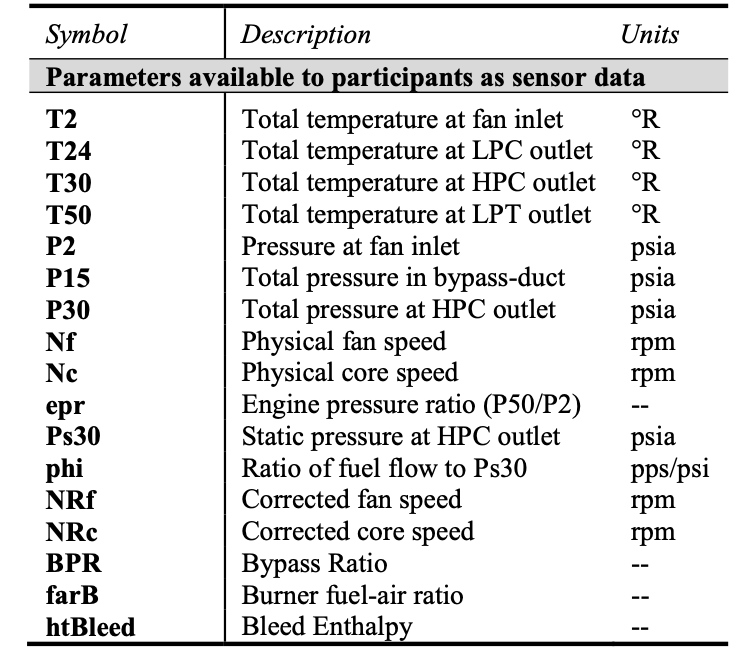



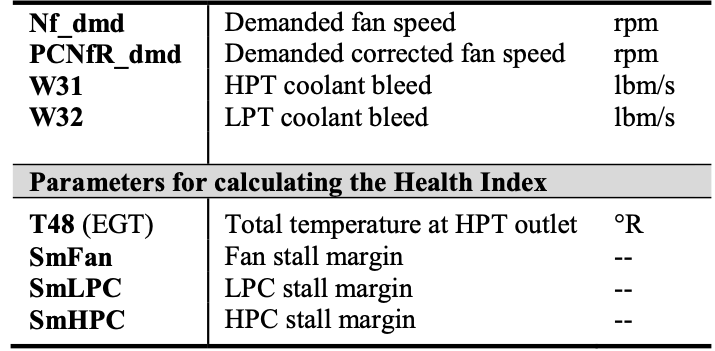

### Identifying **maximum cycle time** for for each Engine number

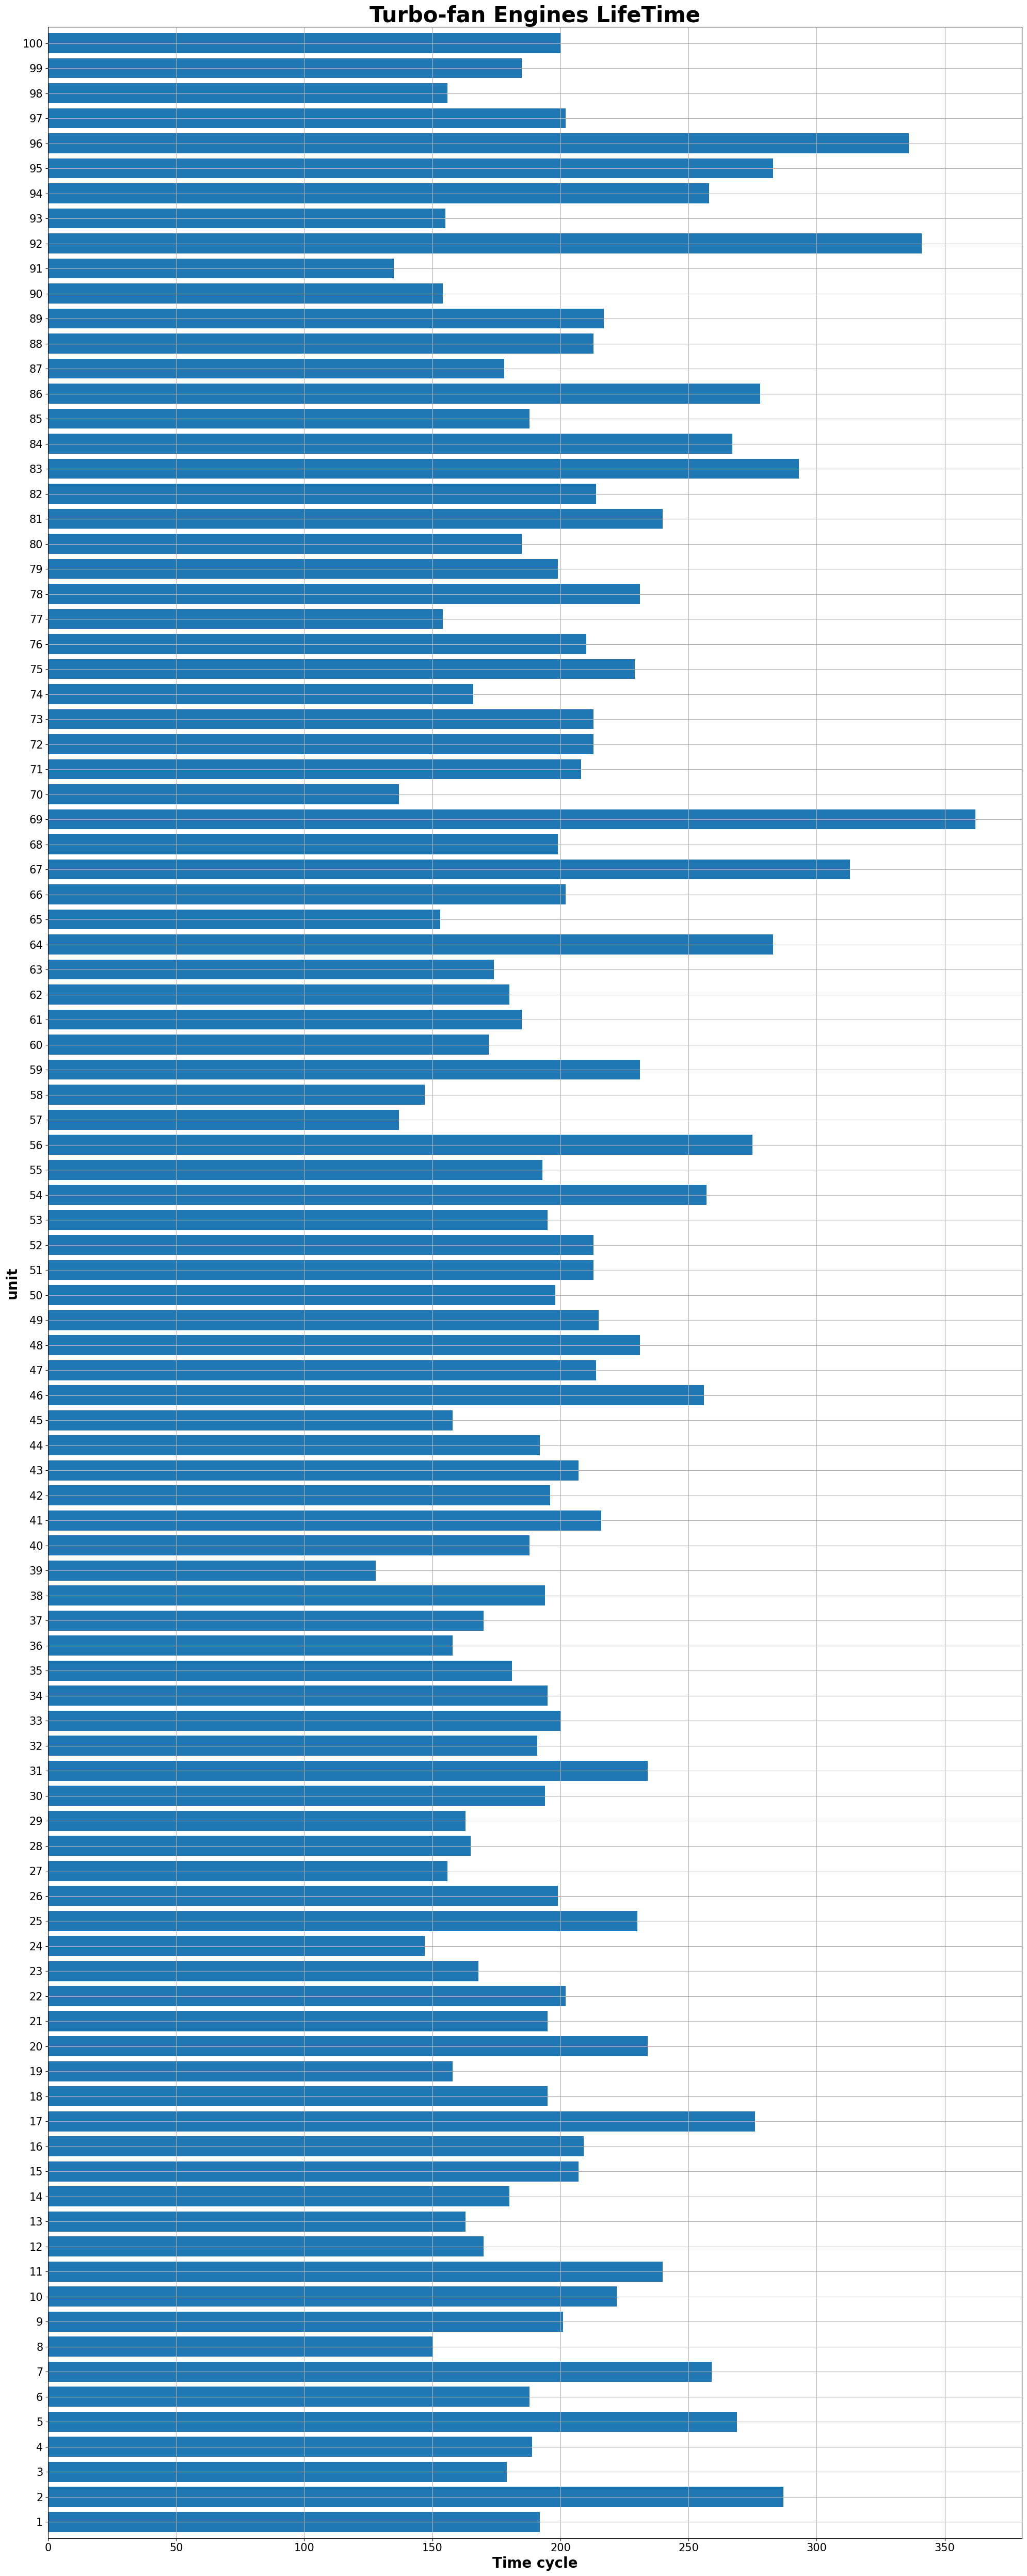

In [170]:
max_time_cycles=train[index_names].groupby('unit_number').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbo-fan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Plotting distribution plot to know the **distribution** of cycle time .

Text(0.5, 9.444444444444459, 'max time cycle')

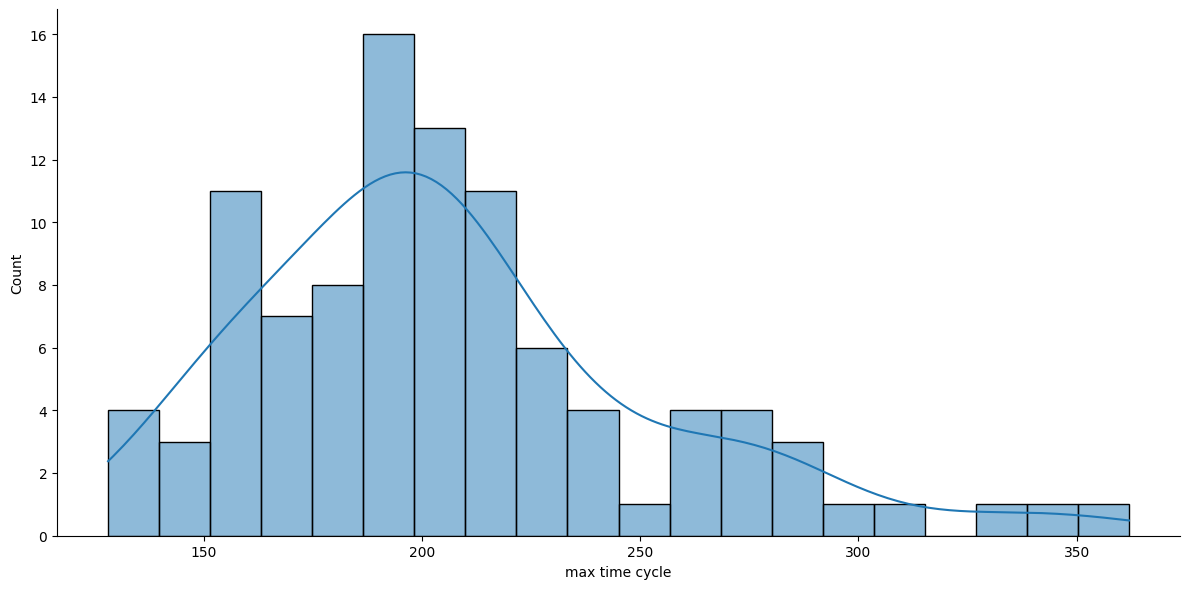

In [171]:
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

Joining of RUL data


In [172]:
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number') 
    max_time_cycles = train_grouped_by_unit['time_cycles'].max() 
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1) 
    return merged

In [173]:
train = add_RUL_column(train)

In [174]:
train[['unit_number','RUL']]


,unit_number,RUL
0,1,191
1,1,190
2,1,189
3,1,188
4,1,187
...,...,...
20626,100,4
20627,100,3
20628,100,2
20629,100,1


In [175]:
maxrul_u = train.groupby('unit_number').max().reset_index()
maxrul_u.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,192,0.0047,0.0005,100.0,518.67,644.21,1605.44,1432.52,14.62,...,2388.35,8140.58,8.5227,0.03,398,2388,100.0,39.18,23.4999,191
1,2,287,0.0076,0.0006,100.0,518.67,643.94,1610.10,1431.17,14.62,...,2388.26,8175.57,8.5377,0.03,398,2388,100.0,39.24,23.6005,286
2,3,179,0.0058,0.0005,100.0,518.67,643.93,1606.50,1438.51,14.62,...,2388.20,8255.34,8.5363,0.03,399,2388,100.0,39.23,23.5181,178
3,4,189,0.0059,0.0006,100.0,518.67,644.53,1612.11,1434.12,14.62,...,2388.17,8259.42,8.5462,0.03,399,2388,100.0,39.21,23.5074,188
4,5,269,0.0055,0.0005,100.0,518.67,644.02,1609.41,1434.59,14.62,...,2388.23,8215.19,8.5410,0.03,398,2388,100.0,39.29,23.5503,268


# **Discovering Co-relation**

Correlation is a **statistical** measure that expresses the extent to which two **variables** are **linearly related** (meaning they change together at a constant rate). It’s a common tool for describing simple relationships without making a statement about **cause and effect**.




We describe correlations with a unit-free measure called the correlation coefficient which ranges from -1 to +1 and is denoted by r. Statistical significance is indicated with a p-value. Therefore, correlations are typically written with two key numbers: r = and p = .

The closer r is to zero, the weaker the linear relationship.

1.   **Positive** r values indicate a positive correlation, where the values of both variables tend to **increase** together.
2.   **Negative** r values indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable **decrease**.




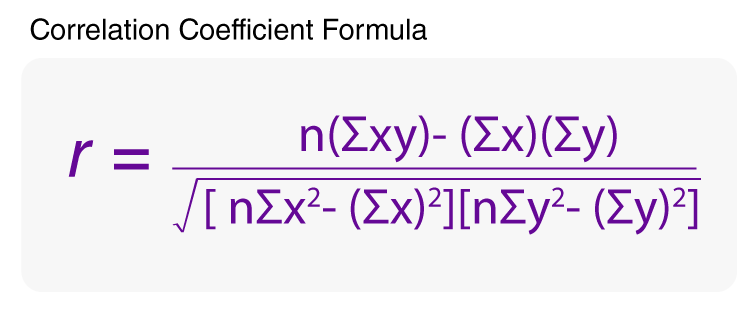



In [176]:
corr = train.corr()

In [177]:
import numpy as np

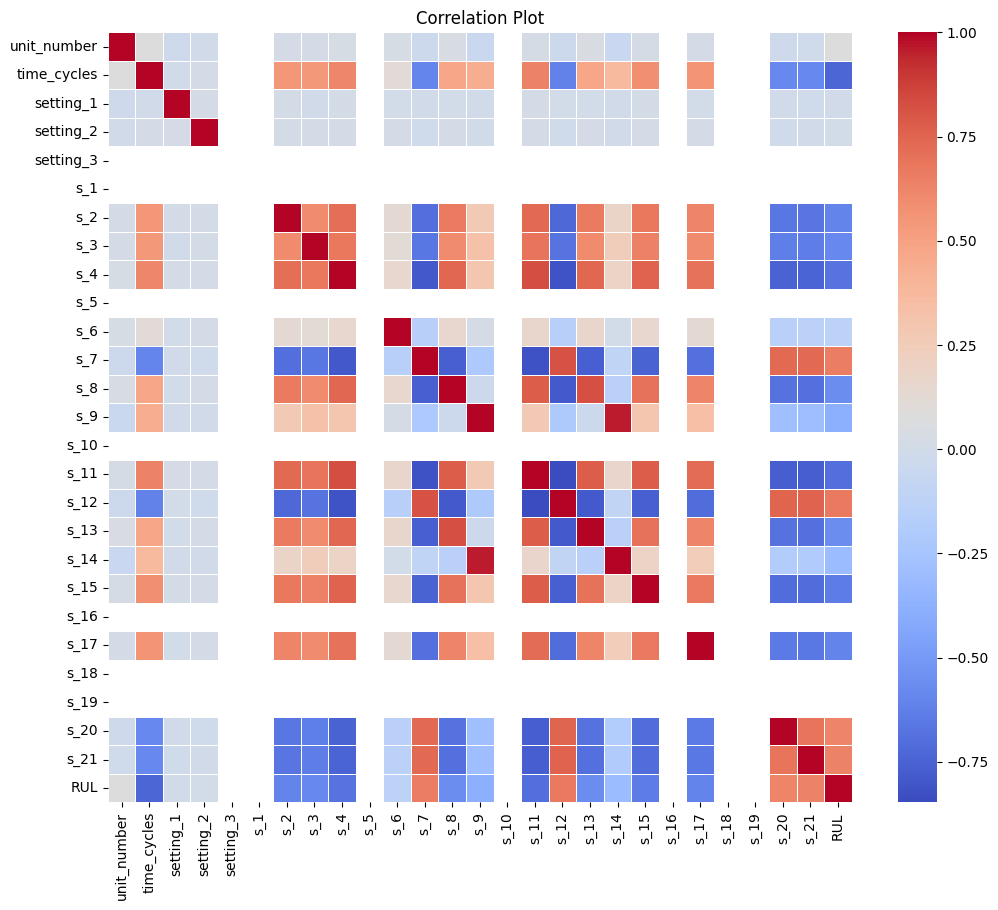

In [178]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot')
plt.show();

**Mutual information** is a quantity that measures a **relationship** between two
random **variables** that are sampled simultaneously. In particular, it measures
how much information is communicated, on average, in one random variable
about another.


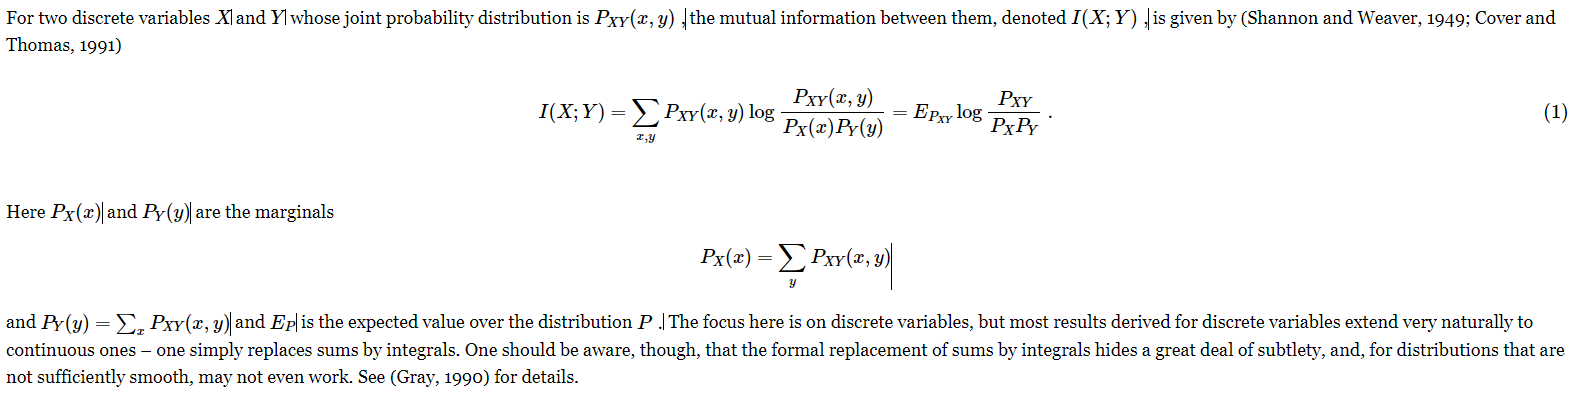

In [179]:
from sklearn.feature_selection import mutual_info_regression

In [180]:
mutual_info=mutual_info_regression

In [181]:
X = train.drop(['RUL'], axis=1)
y = train['RUL']

In [182]:
mutual_info= mutual_info_regression(X, y)

In [183]:
for i in range(len(X.columns)):
    print('Feature {}: MUTUAL_INFO = {}'.format(X.columns[i], mutual_info[i]))

Feature unit_number: MUTUAL_INFO = 0.0
Feature time_cycles: MUTUAL_INFO = 0.8812340718587501
Feature setting_1: MUTUAL_INFO = 0.0002094139032626785
Feature setting_2: MUTUAL_INFO = 0.0
Feature setting_3: MUTUAL_INFO = 0.006305975753876147
Feature s_1: MUTUAL_INFO = 0.003793462340388132
Feature s_2: MUTUAL_INFO = 0.339416768967693
Feature s_3: MUTUAL_INFO = 0.3078963963870409
Feature s_4: MUTUAL_INFO = 0.46676120301592405
Feature s_5: MUTUAL_INFO = 0.0
Feature s_6: MUTUAL_INFO = 0.011914441536172049
Feature s_7: MUTUAL_INFO = 0.4201235652157198
Feature s_8: MUTUAL_INFO = 0.2622134976467372
Feature s_9: MUTUAL_INFO = 0.22117689046494426
Feature s_10: MUTUAL_INFO = 0.009953372331798604
Feature s_11: MUTUAL_INFO = 0.5058343342774494
Feature s_12: MUTUAL_INFO = 0.44182798046986704
Feature s_13: MUTUAL_INFO = 0.2643484108518708
Feature s_14: MUTUAL_INFO = 0.22178577492794727
Feature s_15: MUTUAL_INFO = 0.3863723968241217
Feature s_16: MUTUAL_INFO = 4.342316444061467e-05
Feature s_17: MUTUAL_

In [184]:
# Higher the value the more dependent  is the value on RUL

In [185]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X.columns
mutual_info.sort_values(ascending=False)

time_cycles    0.881234
s_11           0.505834
s_4            0.466761
s_12           0.441828
s_7            0.420124
s_15           0.386372
s_21           0.381456
s_20           0.371449
s_2            0.339417
s_17           0.325576
s_3            0.307896
s_13           0.264348
s_8            0.262213
s_14           0.221786
s_9            0.221177
s_6            0.011914
s_10           0.009953
setting_3      0.006306
s_1            0.003793
setting_1      0.000209
s_16           0.000043
s_5            0.000000
setting_2      0.000000
s_18           0.000000
s_19           0.000000
unit_number    0.000000
dtype: float64

<Axes: >

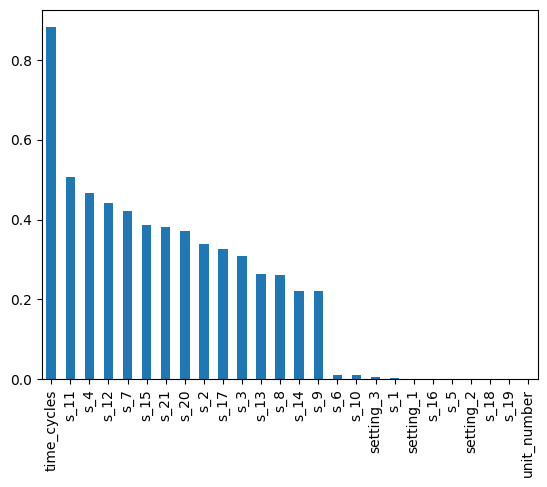

In [186]:
mutual_info.sort_values(ascending=False).plot.bar()

In [187]:
from sklearn.feature_selection import SelectPercentile

In [188]:
#Selecting top 20 percentile

In [189]:
selected_top_columns=SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X,y)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7fe754dcc700>)

In [190]:
selected_top_columns.get_support()

array([False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False])

In [191]:
X.columns[selected_top_columns.get_support()]

Index(['time_cycles', 's_4', 's_7', 's_11', 's_12'], dtype='object')

In [192]:
X_selected=X[['time_cycles','s_4','s_7','s_11','s_12']]

In [193]:
X_selected

,time_cycles,s_4,s_7,s_11,s_12
0,1,1400.60,554.36,47.47,521.66
1,2,1403.14,553.75,47.49,522.28
2,3,1404.20,554.26,47.27,522.42
3,4,1401.87,554.45,47.13,522.86
4,5,1406.22,554.00,47.28,522.19
...,...,...,...,...,...
20626,196,1428.63,551.43,48.07,519.49
20627,197,1433.58,550.86,48.04,519.68
20628,198,1428.18,550.94,48.09,520.01
20629,199,1426.53,550.68,48.39,519.67


In [194]:
X_selected.shape

(20631, 5)

In [195]:
X_selected.ndim

2

In [196]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,BatchNormalization,Dense

In [197]:
model=Sequential()

In [198]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [199]:
X_train = dftrain.iloc[:, :-1].values
y_train = dftrain.iloc[:, -1].values

In [200]:
X_test = dfvalid.iloc[:, :-1].values
y_test = dfvalid.iloc[:, -1].values

In [201]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [202]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [203]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [204]:
model.compile(optimizer='adam', loss='mse')

In [205]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
645/645 [==============================] - 13s 10ms/step - loss: 72.8969
Epoch 2/50
645/645 [==============================] - 5s 8ms/step - loss: 2.2032
Epoch 3/50
645/645 [==============================] - 6s 9ms/step - loss: 2.1876
Epoch 4/50
645/645 [==============================] - 6s 10ms/step - loss: 2.1950
Epoch 5/50
645/645 [==============================] - 5s 8ms/step - loss: 2.1697
Epoch 6/50
645/645 [==============================] - 6s 9ms/step - loss: 2.1470
Epoch 7/50
645/645 [==============================] - 6s 10ms/step - loss: 2.1178
Epoch 8/50
645/645 [==============================] - 5s 8ms/step - loss: 2.0520
Epoch 9/50
645/645 [==============================] - 6s 10ms/step - loss: 2.0732
Epoch 10/50
645/645 [==============================] - 6s 9ms/step - loss: 1.9977
Epoch 11/50
645/645 [==============================] - 5s 8ms/step - loss: 1.9847
Epoch 12/50
645/645 [==============================] - 6s 10ms/step - loss: 1.9399
Epoch 13/50
645/64

In [206]:
y_pred = model.predict(X_test)
mse = model.evaluate(X_test, y_test)


410/410 [==============================] - 2s 3ms/step - loss: 0.0069


In [207]:
import matplotlib.pyplot as plt

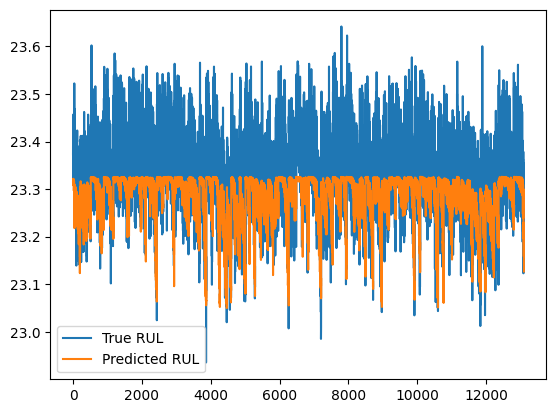

In [208]:
plt.plot(y_test, label='True RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.legend()
plt.show()

In [209]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [210]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [211]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")

MAE: 0.07
RMSE: 0.08
R2 score: 0.03
